# Build a regression model: Get started with R and Tidymodels for regression models

## Introduction to Regression - Lesson 1

#### Putting it into perspective

✅ There are many types of regression methods, and which one you pick depends on the answer you're looking for. If you want to predict the probable height for a person of a given age, you'd use `linear regression`, as you're seeking a **numeric value**. If you're interested in discovering whether a type of cuisine should be considered vegan or not, you're looking for a **category assignment** so you would use `logistic regression`. You'll learn more about logistic regression later. Think a bit about some questions you can ask of data, and which of these methods would be more appropriate.

In this section, you will work with a [small dataset about diabetes](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html). Imagine that you wanted to test a treatment for diabetic patients. Machine Learning models might help you determine which patients would respond better to the treatment, based on combinations of variables. Even a very basic regression model, when visualized, might show information about variables that would help you organize your theoretical clinical trials.

That said, let's get started on this task!




## 1. Loading up our tool set

For this task, we'll require the following packages:

-   `tidyverse`: The [tidyverse](https://www.tidyverse.org/) is a [collection of R packages](https://www.tidyverse.org/packages) designed to makes data science faster, easier and more fun!

-   `tidymodels`: The [tidymodels](https://www.tidymodels.org/) framework is a [collection of packages](https://www.tidymodels.org/packages/) for modeling and machine learning.

You can have them installed as:

`install.packages(c("tidyverse", "tidymodels"))`

The script below checks whether you have the packages required to complete this module and installs them for you in case some are missing.

In [ ]:
suppressWarnings(if(!require("pacman")) install.packages("pacman"))
pacman::p_load(tidyverse, tidymodels)

Now, let's load these awesome packages and make them available in our current R session.(This is for mere illustration, `pacman::p_load()` already did that for you)

In [13]:
# load the core Tidyverse packages
library(tidyverse)

# load the core Tidymodels packages
library(tidymodels)


## 2. The diabetes dataset

In this exercise, we'll put our regression skills into display by making predictions on a diabetes dataset. The [diabetes dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt) includes `442 samples` of data around diabetes, with 10 predictor feature variables, `age`, `sex`, `body mass index`, `average blood pressure`, and `six blood serum measurements` as well as an outcome variable `y`: a quantitative measure of disease progression one year after baseline.

|Number of observations|442|
|----------------------|:---|
|Number of predictors|First 10 columns are numeric predictive|
|Outcome/Target|Column 11 is a quantitative measure of disease progression one year after baseline|
|Predictor Information|- age in years
||- sex
||- bmi body mass index
||- bp average blood pressure
||- s1 tc, total serum cholesterol
||- s2 ldl, low-density lipoproteins
||- s3 hdl, high-density lipoproteins
||- s4 tch, total cholesterol / HDL
||- s5 ltg, possibly log of serum triglycerides level
||- s6 glu, blood sugar level|




> 🎓 Remember, this is supervised learning, and we need a named 'y' target.

Before you can manipulate data with R, you need to import the data into R's memory, or build a connection to the data that R can use to access the data remotely.

> The [readr](https://readr.tidyverse.org/) package, which is part of the Tidyverse, provides a fast and friendly way to read rectangular data into R.

Now, let's load the diabetes dataset provided in this source URL: <https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html>

Also, we'll perform a sanity check on our data using `glimpse()` and display the first 5 rows using `slice()`.

Before going any further, let's also introduce something you will encounter often in R code 🥁🥁: the pipe operator `%>%`

The pipe operator (`%>%`) performs operations in logical sequence by passing an object forward into a function or call expression. You can think of the pipe operator as saying "and then" in your code.

In [3]:
# Import the data set
diabetes <- read_table(file = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt")


# Get a glimpse and dimensions of the data
glimpse(diabetes)


# Select the first 5 rows of the data
diabetes %>% 
  slice(1:5)


── Column specification ────────────────────────────────────────────────────────
cols(
  age = col_double(),
  sex = col_double(),
  bmi = col_double(),
  map = col_double(),
  tc = col_double(),
  ldl = col_double(),
  hdl = col_double(),
  tch = col_double(),
  ltg = col_double(),
  glu = col_double(),
  y = col_double()
)



Rows: 442
Columns: 11
$ age <dbl> 0.038075906, -0.001882017, 0.085298906, -0.089062939, 0.005383060,…
$ sex <dbl> 0.05068012, -0.04464164, 0.05068012, -0.04464164, -0.04464164, -0.…
$ bmi <dbl> 0.061696207, -0.051474061, 0.044451213, -0.011595015, -0.036384692…
$ map <dbl> 0.021872355, -0.026327835, -0.005670611, -0.036656447, 0.021872355…
$ tc  <dbl> -0.044223498, -0.008448724, -0.045599451, 0.012190569, 0.003934852…
$ ldl <dbl> -3.482076e-02, -1.916334e-02, -3.419447e-02, 2.499059e-02, 1.55961…
$ hdl <dbl> -0.043400846, 0.074411564, -0.032355932, -0.036037570, 0.008142084…
$ tch <dbl> -0.002592262, -0.039493383, -0.002592262, 0.034308859, -0.00259226…
$ ltg <dbl> 0.019908421, -0.068329744, 0.002863771, 0.022692023, -0.031991445,…
$ glu <dbl> -0.017646125, -0.092204050, -0.025930339, -0.009361911, -0.0466408…
$ y   <dbl> 151, 75, 141, 206, 135, 97, 138, 63, 110, 310, 101, 69, 179, 185, …


age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.038075906,0.05068012,0.06169621,0.021872355,-0.044223498,-0.03482076,-0.043400846,-0.002592262,0.019908421,-0.017646125,151
-0.001882017,-0.04464164,-0.05147406,-0.026327835,-0.008448724,-0.01916334,0.074411564,-0.039493383,-0.068329744,-0.092204050,75
0.085298906,0.05068012,0.04445121,-0.005670611,-0.045599451,-0.03419447,-0.032355932,-0.002592262,0.002863771,-0.025930339,141
-0.089062939,-0.04464164,-0.01159501,-0.036656447,0.012190569,0.02499059,-0.036037570,0.034308859,0.022692023,-0.009361911,206
0.005383060,-0.04464164,-0.03638469,0.021872355,0.003934852,0.01559614,0.008142084,-0.002592262,-0.031991445,-0.046640874,135


`glimpse()` shows us that this data has 442 rows and 11 columns with all the columns being of data type `double` 

<br>



> glimpse() and slice() are functions in [`dplyr`](https://dplyr.tidyverse.org/). Dplyr, part of the Tidyverse, is a grammar of data manipulation that provides a consistent set of verbs that help you solve the most common data manipulation challenges

<br>

Now that we have the data, let's narrow down to one feature (`bmi`) to target for this exercise. This will require us to select the desired columns. So, how do we do this?

[`dplyr::select()`](https://dplyr.tidyverse.org/reference/select.html) allows us to *select* (and optionally rename) columns in a data frame.

In [4]:
# Select predictor feature `bmi` and outcome `y`

diabetes_select <- diabetes %>% 
  select(c(bmi, y))

# Print the first 5 rows
diabetes_select %>% 
  slice(1:10)

bmi,y
<dbl>,<dbl>
0.061696207,151
-0.051474061,75
0.044451213,141
-0.011595015,206
-0.036384692,135
-0.040695940,97
-0.047162813,138
-0.001894706,63
0.061696207,110


## 3. Training and Testing data

It's common practice in supervised learning to *split* the data into two subsets; a (typically larger) set with which to train the model, and a smaller "hold-back" set with which to see how the model performed.

Now that we have data ready, we can see if a machine can help determine a logical split between the numbers in this dataset. We can use the [rsample](https://tidymodels.github.io/rsample/) package, which is part of the Tidymodels framework, to create an object that contains the information on *how* to split the data, and then two more rsample functions to extract the created training and testing sets:


In [6]:

set.seed(2056)
# Split 67% of the data for training and the rest for tesing
diabetes_split <- diabetes_select %>% 
  initial_split(prop = 0.67)

# Extract the resulting train and test sets
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)

# Print the first 3 rows of the training set
diabetes_train %>% 
  slice(1:10)

bmi,y
<dbl>,<dbl>
-0.05362969,83
-0.02345095,144
-0.06440781,170
-0.01051720,25
0.04768465,317
0.03151747,296
-0.02560657,170
-0.06117437,89
-0.03961813,124


## 4. Train a linear regression model with Tidymodels

Now we are ready to train our model!

In Tidymodels, you specify models using `parsnip()` by specifying three concepts:

-   Model **type** differentiates models such as linear regression, logistic regression, decision tree models, and so forth.

-   Model **mode** includes common options like regression and classification; some model types support either of these while some only have one mode.

-   Model **engine** is the computational tool which will be used to fit the model. Often these are R packages, such as **`"lm"`** or **`"ranger"`**

This modeling information is captured in a model specification, so let's build one!

In [7]:
# Build a linear model specification
lm_spec <- 
  # Type
  linear_reg() %>% 
  # Engine
  set_engine("lm") %>% 
  # Mode
  set_mode("regression")


# Print the model specification
lm_spec

Linear Regression Model Specification (regression)

Computational engine: lm 


After a model has been *specified*, the model can be `estimated` or `trained` using the [`fit()`](https://parsnip.tidymodels.org/reference/fit.html) function, typically using a formula and some data.

`y ~ .` means we'll fit `y` as the predicted quantity/target, explained by all the predictors/features ie, `.` (in this case, we only have one predictor: `bmi` )

In [8]:
# Build a linear model specification
lm_spec <- linear_reg() %>% 
  set_engine("lm") %>%
  set_mode("regression")


# Train a linear regression model
lm_mod <- lm_spec %>% 
  fit(y ~ ., data = diabetes_train)

# Print the model
lm_mod

parsnip model object


Call:
stats::lm(formula = y ~ ., data = data)

Coefficients:
(Intercept)          bmi  
      154.7        996.3  


From the model output, we can see the coefficients learned during training. They represent the coefficients of the line of best fit that gives us the lowest overall error between the actual and predicted variable.
<br>

## 5. Make predictions on the test set

Now that we've trained a model, we can use it to predict the disease progression y for the test dataset using [parsnip::predict()](https://parsnip.tidymodels.org/reference/predict.model_fit.html). This will be used to draw the line between data groups.

In [9]:
# Make predictions for the test set
predictions <- lm_mod %>% 
  predict(new_data = diabetes_test)

# Print out some of the predictions
predictions %>% 
  slice(1:5)

.pred
<dbl>
216.1699
198.9894
114.1605
107.7178
136.7100


Woohoo! 💃🕺 We just trained a model and used it to make predictions!

When making predictions, the tidymodels convention is to always produce a tibble/data frame of results with standardized column names. This makes it easy to combine the original data and the predictions in a usable format for subsequent operations such as plotting.

`dplyr::bind_cols()` efficiently binds multiple data frames column.

In [10]:
# Combine the predictions and the original test set
results <- diabetes_test %>% 
  bind_cols(predictions)


results %>% 
  slice(1:5)

bmi,y,.pred
<dbl>,<dbl>,<dbl>
0.06169621,151,216.1699
0.04445121,141,198.9894
-0.04069594,97,114.1605
-0.04716281,138,107.7178
-0.01806189,168,136.7100


## 6. Plot modelling results

Now, its time to see this visually 📈. We'll create a scatter plot of all the `y` and `bmi` values of the test set, then use the predictions to draw a line in the most appropriate place, between the model's data groupings.

R has several systems for making graphs, but `ggplot2` is one of the most elegant and most versatile. This allows you to compose graphs by **combining independent components**.

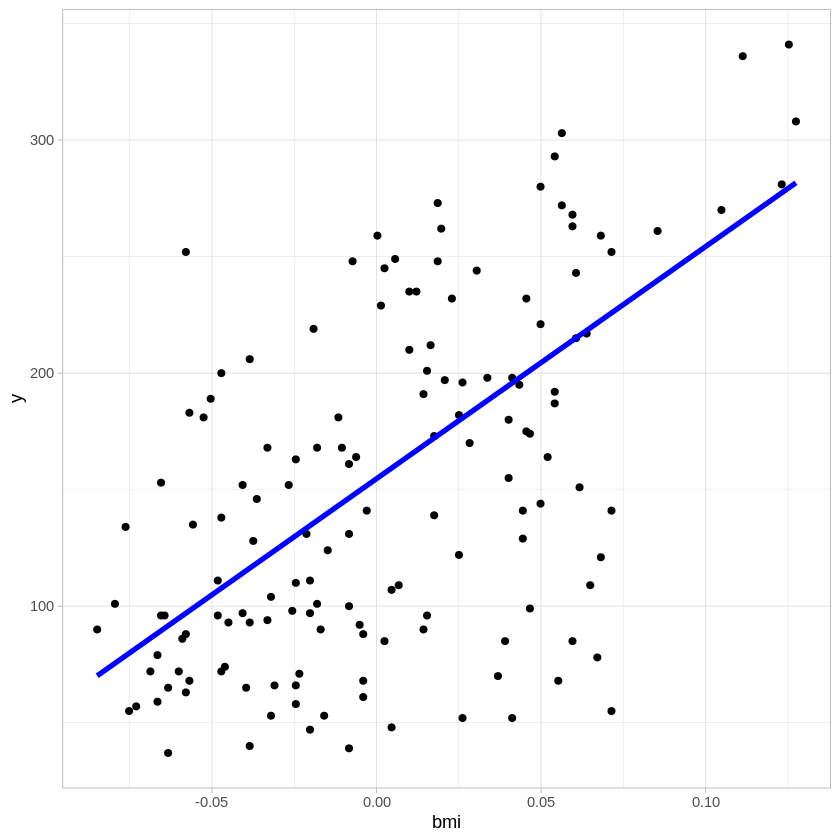

In [12]:
# Set a theme for the plot
theme_set(theme_light())
# Create a scatter plot
results %>% 
  ggplot(aes(x = bmi)) +
  # Add a scatter plot
  geom_point(aes(y = y), size = 1.6) +
  # Add a line plot
  geom_line(aes(y = .pred), color = "blue", linewidth = 1.5)

> ✅ Think a bit about what's going on here. A straight line is running through many small dots of data, but what is it doing exactly? Can you see how you should be able to use this line to predict where a new, unseen data point should fit in relationship to the plot's y axis? Try to put into words the practical use of this model.

Congratulations, you built your first linear regression model, created a prediction with it, and displayed it in a plot!
